# Scenarios

In [1]:
from montecarlo import Die, Game, Analyzer

## Scenario 1: A 2-headed coin

---
Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [2]:
fair = Die(['H', 'T'])
unfair = Die(['H','T'])
unfair.change_weight('H', 5)

In [3]:
fair.show()

,Weight
H,1.0
T,1.0


In [4]:
unfair.show()

,Weight
H,5.0
T,1.0


---
Play a game of 1000 flips of three coins with all fair dice.

In [5]:
fair_game = Game([fair, fair, fair])
fair_game.play(1000)
fair_game.show()

Die,0,1,2
Roll,,,
0,H,T,T
1,H,H,T
2,H,T,T
3,H,T,T
4,H,T,T
...,...,...,...
995,T,H,H
996,H,H,T
997,T,T,H


---
Play a game of 1000 flips with two unfair dice and one fair die.

In [6]:
unfair_game = Game([unfair, unfair, fair])
unfair_game.play(1000)
unfair_game.show()

Die,0,1,2
Roll,,,
0,T,T,H
1,H,H,H
2,H,H,T
3,H,H,T
4,H,H,T
...,...,...,...
995,T,H,T
996,H,H,H
997,H,H,T


---
For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

In [7]:
fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)

fair_frq = fair_analyzer.jackpot() / 1000
unfair_frq = unfair_analyzer.jackpot() / 1000

print('Relative frequency of jackpots for the fair game:', fair_frq)
print('Relative frequency of jackpots for the unfair game:', unfair_frq)

Relative frequency of jackpots for the fair game: 0.235
Relative frequency of jackpots for the unfair game: 0.35


---
Show your results, comparing the two relative frequencies, in a simple bar chart.

<BarContainer object of 2 artists>

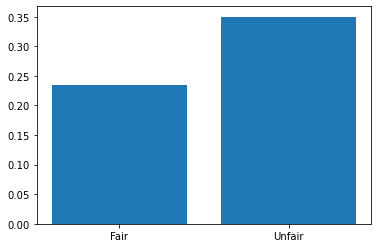

In [8]:
import matplotlib.pyplot as plt
plt.bar(['Fair', 'Unfair'],[fair_frq, unfair_frq])

## Scenario 2: A 6-sided die

---
Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [9]:
fair = Die([1, 2, 3, 4, 5, 6])
fair.show()

,Weight
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [10]:
unfair1 = Die([1, 2, 3, 4, 5, 6])
unfair1.change_weight(6, 5)
unfair1.show()

,Weight
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


In [11]:
unfair2 = Die([1, 2, 3, 4, 5, 6])
unfair2.change_weight(1, 5)
unfair2.show()

,Weight
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


---
Play a game of 10000 rolls with 5 fair dice. 

Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [12]:
fair_game = Game([fair, fair, fair, fair, fair])
fair_game.play(10000)

unfair_game = Game([unfair1, unfair1, unfair2, fair, fair])
unfair_game.play(10000)

---
For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [13]:
fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)

fair_frq = fair_analyzer.jackpot() / 1000
unfair_frq = unfair_analyzer.jackpot() / 1000

print('Relative frequency of jackpots for the fair game:', fair_frq)
print('Relative frequency of jackpots for the unfair game:', unfair_frq)

Relative frequency of jackpots for the fair game: 0.012
Relative frequency of jackpots for the unfair game: 0.01


<BarContainer object of 2 artists>

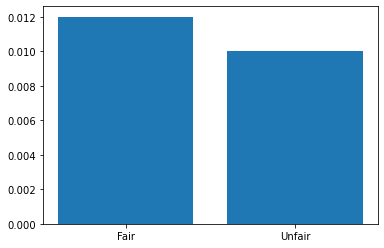

In [14]:
plt.bar(['Fair', 'Unfair'],[fair_frq, unfair_frq])

---
Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [15]:
fair_analyzer.combo()
unfair_analyzer.combo()

In [16]:
fair_analyzer.combos.head(10)

Counts
0 1 2 3 4        
2 3 4 5 6     172
1 3 4 5 6     165
  2 3 4 5     154
        6     150
      5 6     149
    4 5 6     132
    2 5 6     101
    4 4 6      98
  3 3 4 6      93
  4 5 5 6      93

In [17]:
unfair_analyzer.combos.head(10)

Counts
0 1 2 3 4        
1 3 5 6 6     213
  2 3 6 6     193
    5 6 6     189
    4 6 6     185
  4 5 6 6     180
  3 4 6 6     180
      5 6     174
  1 2 6 6     164
  2 3 5 6     164
      4 6     161

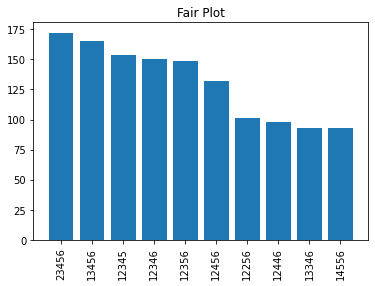

In [18]:
fair_plot = fair_analyzer.combos.head(10).reset_index()
fair_plot["labels"] = fair_plot[0].astype(str) + fair_plot[1].astype(str) + fair_plot[2].astype(str) \
                + fair_plot[3].astype(str) + fair_plot[4].astype(str)
fair_plot = fair_plot[['Counts', 'labels']]
plt.bar(fair_plot['labels'],fair_plot['Counts'])
plt.xticks(rotation='vertical');
plt.title("Fair Plot");

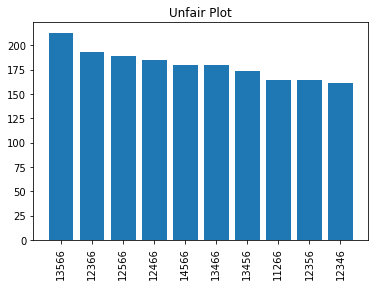

In [19]:
unfair_plot = unfair_analyzer.combos.head(10).reset_index()
unfair_plot["labels"] = unfair_plot[0].astype(str) + unfair_plot[1].astype(str) + unfair_plot[2].astype(str) \
                + unfair_plot[3].astype(str) + unfair_plot[4].astype(str)
unfair_plot = unfair_plot[['Counts', 'labels']]
plt.bar(unfair_plot['labels'],unfair_plot['Counts'])
plt.xticks(rotation='vertical');
plt.title("Unfair Plot");

## Scenario 3: A 6-sided die

---
Create a "die" of letters from a to z with weights based on their frequency of usage.

In [20]:
letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
           'q','r','s','t','u','v','w','x','y','z']
values = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 
          0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351,
          6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

alphabet = Die(letters)
for i in range(0,len(letters)):
    alphabet.change_weight(letters[i], values[i])

In [21]:
alphabet.show()

,Weight
a,8.4966
b,2.0720
c,4.5388
d,3.3844
e,11.1607
f,1.8121
g,2.4705
h,3.0034
i,7.5448
j,0.1965


---
Play a game involving 5 of these dice with 1000 rolls.

In [35]:
alphabet_game = Game([alphabet, alphabet, alphabet, alphabet, alphabet])
alphabet_game.play(1000)

In [36]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
alphabet_game.show()

Die,0,1,2,3,4
Roll,,,,,
0,a,m,e,u,c
1,l,g,u,l,v
2,e,i,t,f,i
3,c,f,i,e,e
4,a,r,l,c,n
5,u,c,t,n,a
6,m,o,o,k,s
7,p,b,t,n,s
8,e,h,l,i,i


---
How many combos can you see that look like actual English words?